# 📊  Exploratory Analysis for Retail Sales and Customer Demographics📎
Welcome to the retail sales and customer dataset — a realistic simulation of a retail environment. This dataset is an excellent foundation for finding insights on consumer purchasing behavior over time.

# Dataset description
The dataset provides a snapshot of retail operations and customer characteristics, including sales transaction data.

# Breakdown of each column
- **Transaction ID** - A unique identifier for each transaction.- **Date** - The date on which the transaction took place (used for time-based trends).
- **Customer ID** - A unique identifier for each customer.
- **Gender** - The gender of the customer (Male or Female), used to study demographic patterns.
- **Age** - The age of the customer, for age-group segmentation and behavior analysis.
- **Product Category** - The category of product purchased. Useful for identifying popular products.
- **Quantity** - The number of units purchased in a transaction.
- **Price per Unit** - The selling price of a single unit of the product.
- **Total Amount** - The total price paid for the transaction (Quantity × Price per Unit). This is a metric for revenue analysis.

# ❓ Key Questions 
1. **Which product categories are most popular?**
   - Which categories bring in the most revenue?
2. **How do age and gender affect purchasing behavior?**
   - Which age groups spend more and in which categories?
3. **What is the average spending per transaction?**
   - Are high-value purchases associated with specific demographics or categories?
4. **How do trends in sales vary overtime?**
   - Are certain months more profitable due to holidays, sales, etc.
5. **Are there correlations between variables?**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [124]:
#load the data
retail_sales_df = pd.read_csv(r'C:\Documents\portfolio_projects\exploratory_data_analysis\eda_project_2\retail_sales_dataset.csv')

In [126]:
retail_sales_df.shape

(1000, 9)

In [128]:
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [130]:
retail_sales_df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [132]:
#check for duplicates
retail_sales_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [134]:
#check for nulls
retail_sales_df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [136]:
#here is some basic gender information
gender_info = retail_sales_df.groupby('Gender')['Age'].describe()
gender_info

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,510.0,41.356863,13.568067,18.0,29.0,42.0,52.75,64.0
Male,490.0,41.428571,13.812208,18.0,30.0,42.0,54.00,64.0


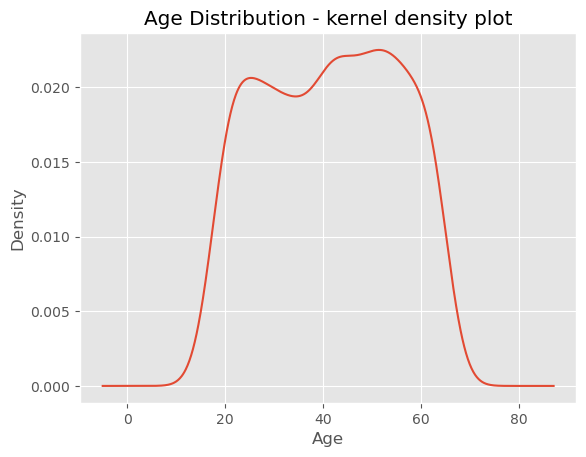

In [245]:
#probability density - age
age_density = retail_sales_df['Age'].plot(kind='kde')

#add labels
age_density.set_xlabel('Age')
plt.title("Age Distribution - kernel density plot")

#from this plot, it is visible that the highest concentration of customers are in their 40s
plt.show()

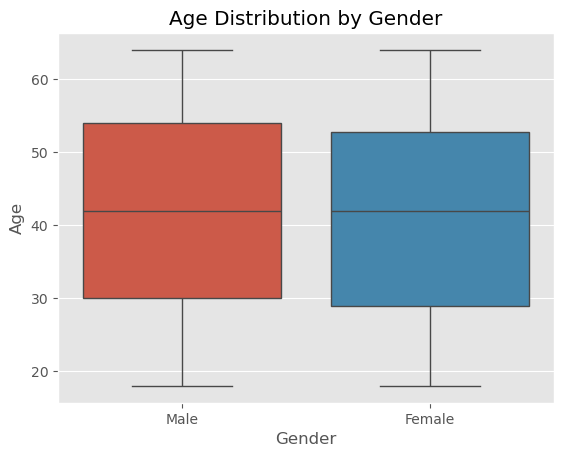

In [140]:
#create a box plot to comapre age distriutions across genders.
sns.boxplot(data=retail_sales_df,
            x="Gender",
            y="Age",
            hue='Gender',
            legend=False)
plt.title("Age Distribution by Gender")

#add labels
plt.xlabel("Gender")
plt.ylabel("Age")

plt.show()

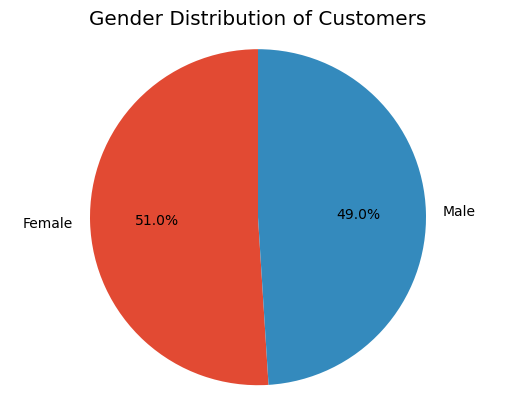

In [142]:
gender_counts = retail_sales_df['Gender'].value_counts()

#make a pie chart distribution
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Customers')
plt.axis('equal')
plt.show()

In [148]:
retail_sales_df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

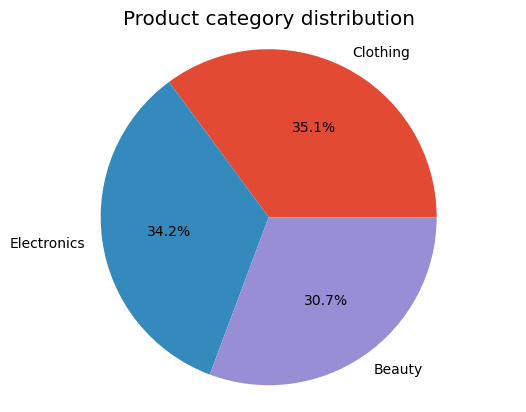

In [150]:
product_category_counts = retail_sales_df['Product Category'].value_counts()

# Create a pie chart
colors=['red', 'blue', 'purple']
plt.pie(product_category_counts, labels=product_category_counts.index, autopct='%1.1f%%')
plt.title('Product category distribution')
plt.axis('equal')
plt.show()

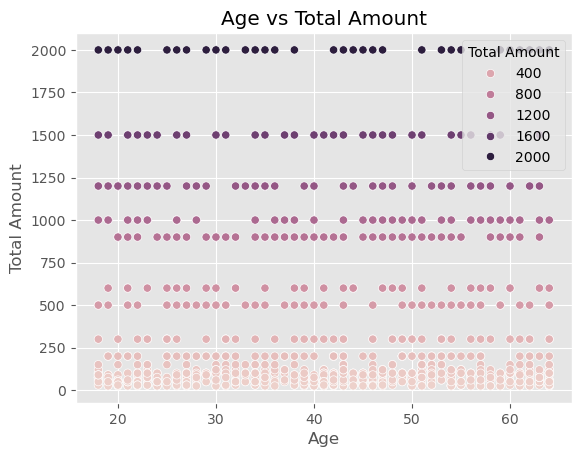

In [252]:
sns.scatterplot(x='Age',
                y='Total Amount',
                hue='Total Amount',
                data=retail_sales_df)
plt.title('Age vs Total Amount')
plt.show()

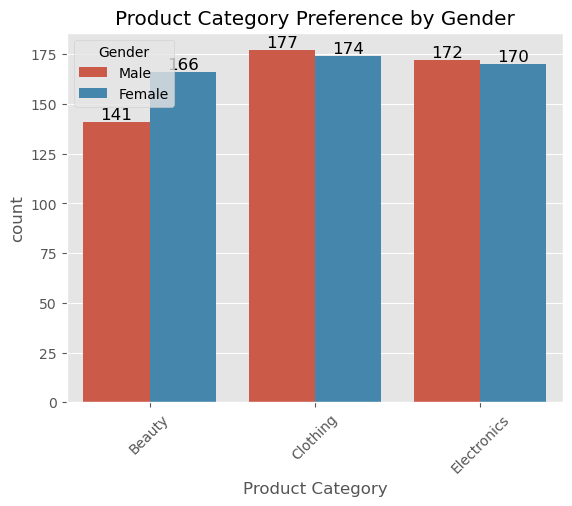

In [152]:
#this chart shows how males and females purchased products across different product categories
prod_category_by_gender = sns.countplot(x='Product Category',
                          hue='Gender',
                          data=retail_sales_df
                          )

# Add labels for total quantities
for bar in prod_category_by_gender.containers:
    prod_category_by_gender.bar_label(bar, fmt='%d', label_type='edge', fontsize=12, color='black')

plt.title('Product Category Preference by Gender')
plt.xticks(rotation=45)
plt.show()

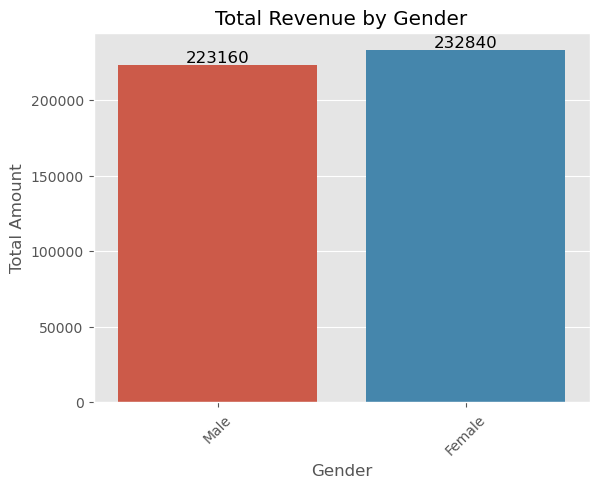

In [234]:
# this chart shows the product category which generated the most revenue
revenue_by_category = sns.barplot(data=retail_sales_df, 
            x='Gender',
            y='Total Amount',
            estimator=sum,
            errorbar=None,
            hue='Gender'
           )

# Add labels for total quantities
for bar in revenue_by_category.containers:
    revenue_by_category.bar_label(bar, fmt='%d', label_type='edge', fontsize=12, color='black')


plt.title('Total Revenue by Gender')
plt.xticks(rotation=45)
plt.show()

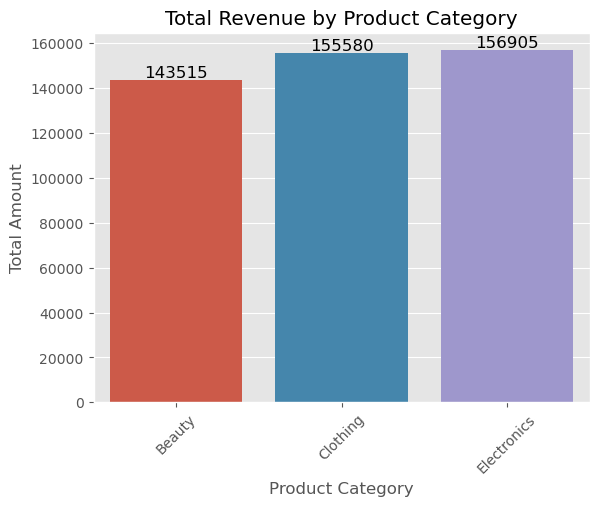

In [154]:
# this chart shows the product category which generated the most revenue
revenue_by_category = sns.barplot(data=retail_sales_df, 
            x='Product Category',
            y='Total Amount',
            estimator=sum,
            errorbar=None,
            hue='Product Category'
           )

# Add labels for total quantities
for bar in revenue_by_category.containers:
    revenue_by_category.bar_label(bar, fmt='%d', label_type='edge', fontsize=12, color='black')


plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()

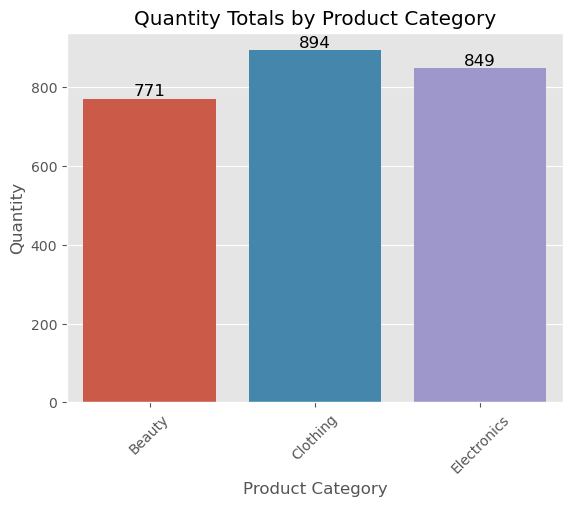

In [279]:
quantity_totals = sns.barplot(data=retail_sales_df, 
            x='Product Category',
            y='Quantity',
            estimator=sum,
            errorbar=None,
            hue = 'Product Category',
            legend = False,
           )

# Add labels for total quantities
for bar in quantity_totals.containers:
    quantity_totals.bar_label(bar, fmt='%d', label_type='edge', fontsize=12, color='black')

plt.title('Quantity Totals by Product Category')
plt.xticks(rotation=45)
plt.show()

In [164]:
#Here is the average spending per transaction, which is simply the mean of total amount.
average_spending = retail_sales_df['Total Amount'].mean()

#here is an f-string to show the result.
print(f"Average spending per transaction is ${average_spending:.2f}")

Average spending per transaction is $456.00


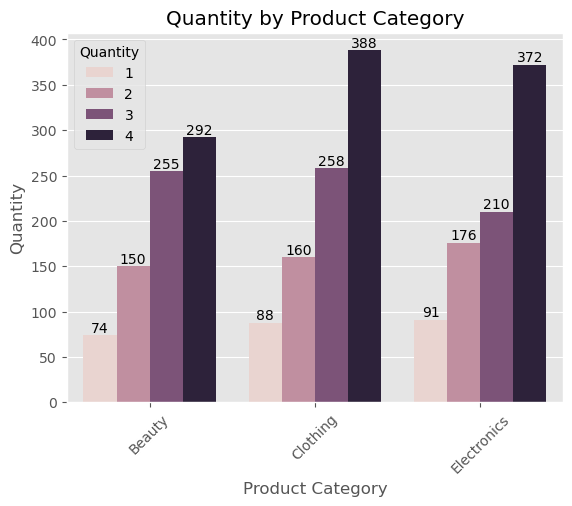

In [243]:
quantities_counts = sns.barplot(data=retail_sales_df, 
            x='Product Category',
            y='Quantity',
            estimator=sum,
            errorbar=None,
            hue = 'Quantity'
           )

# Add labels for total quantities
for bar in quantities_counts.containers:
    quantities_counts.bar_label(bar, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.title('Quantity by Product Category')
plt.xticks(rotation=45)
plt.show()

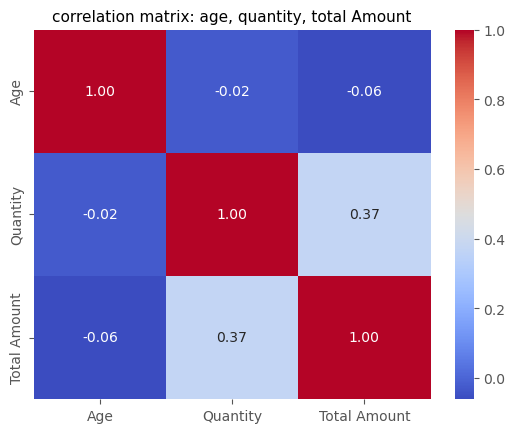

In [54]:
#lets observe some correlations
correlation_matrix = retail_sales_df[['Age', 'Quantity' , 'Total Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation matrix: age, quantity, total Amount', fontsize=11)
plt.show()

# 💡Feature Engineering 
- In order to group sales by month,
- change the 'Date' column type to datetime for use in time-based analysis,
- add a new column called 'Month'.📎

In [168]:
#PART 1 - Adding Month Column

# Ensure the Date column is in datetime format
retail_sales_df['Date'] = pd.to_datetime(retail_sales_df['Date'], errors='coerce')

# Add a new column for Month
retail_sales_df['Month'] = retail_sales_df['Date'].dt.month_name()

# Display the first few rows to verify the new column
print("✔️ 'Month' column added successfully!")
print(retail_sales_df[['Date', 'Month']].head(10))
retail_sales_df.head(10)

✔️ 'Month' column added successfully!
        Date     Month
0 2023-11-24  November
1 2023-02-27  February
2 2023-01-13   January
3 2023-05-21       May
4 2023-05-06       May
5 2023-04-25     April
6 2023-03-13     March
7 2023-02-22  February
8 2023-12-13  December
9 2023-10-07   October


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,April
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,March
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,February
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,December
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,October


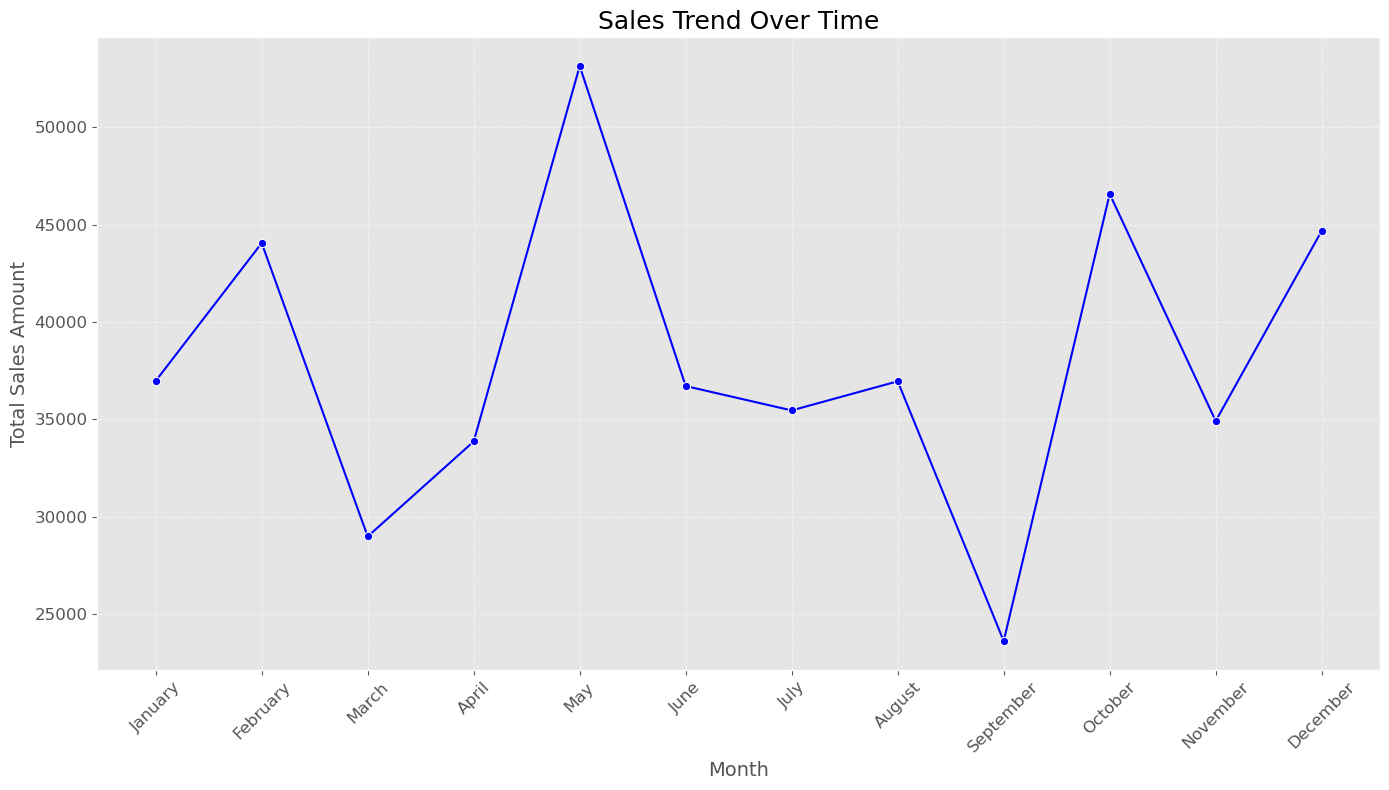

In [206]:
# Sales Trends Over Time

# Ensure 'Month' column is ordered correctly
retail_sales_df['Month'] = pd.Categorical(
    retail_sales_df['Month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Aggregate total sales by month
monthly_sales = retail_sales_df.groupby('Month', observed=True)['Total Amount'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales, marker='o', linewidth=1.5, color='blue')
plt.title('Sales Trend Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


In [237]:
#PART 2 - binning

# Define age bins and renamed labels
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['Child (0-18)', 'Youth (19-25)', 'Adult (26-35)', 'Middle-Aged (36-50)', 'Senior (50+)']

# Create a new column 'Age Group' with the age bins
retail_sales_df['Age Group'] = pd.cut(
    retail_sales_df['Age'], 
    bins=age_bins, 
    labels=age_labels, 
)

# Verify the creation of the 'Age Group' column
print("Age Group Binning Completed:")
print(retail_sales_df[['Age', 'Age Group']].head())
retail_sales_df.head()

Age Group Binning Completed:
   Age            Age Group
0   34        Adult (26-35)
1   26        Adult (26-35)
2   50  Middle-Aged (36-50)
3   37  Middle-Aged (36-50)
4   30        Adult (26-35)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,Adult (26-35)
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,Adult (26-35)
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,Middle-Aged (36-50)
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,Middle-Aged (36-50)
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,Adult (26-35)


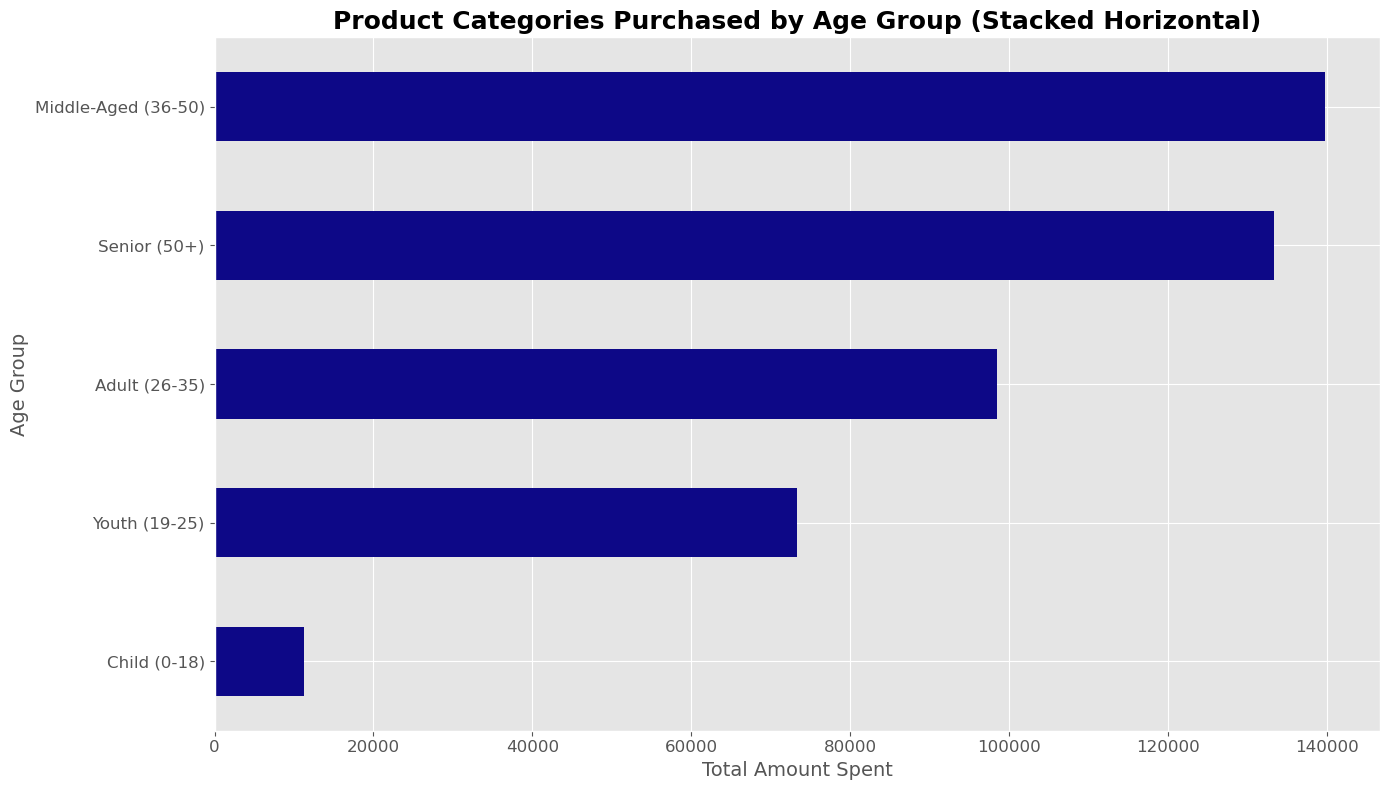

In [232]:
# Aggregate data by Age Group and Product Category
stacked_data = retail_sales_df.groupby('Age Group', observed=True)['Total Amount'].sum().sort_values()

# Plot the horizontal stacked bar chart
stacked_data.plot(
    kind='barh', 
    stacked=True, 
    figsize=(14, 8), 
    colormap='plasma'
)

# Add titles and labels
plt.title('Total Amount Spent by Age Group (Stacked Horizontal)', fontsize=18, fontweight='bold')
plt.xlabel('Total Amount Spent', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# 🔍 Key insights: 5 simple questions

## 1. Which product categories are most popular? ##
After comparing product category, total amount(generated revenue) and quantity totals it shows that:
- **Electronics** generated the highest revenue, followed by clothing and then beauty.
- **Clothing** is purchased in greater quantities, though at a lower revenue.
- The **Electronics** category leads in revenue but the **Clothing** category is more frequently purchased by customers.

## 2. How do age and gender affect purchasing behavior? ##
when it comes to age and purchasing behavior:
- most transcations are less than 250.00 in total amount spent and transactions exceeding 1250.00 are the least frequent.
- the middle aged group(36-50) buy more than all the other age groups, followed by seniors(50+) and then adults(26-35).
- across all transactions the average age is 41. Which makes sense because its a middle age.

when it comes to gender and purchasing behavior:
- in total, females spent more than men with the difference in revenue being 9680.00.
- females buy more beauty products than men, but men buy more electronics and clothing products.
- gender-based preferences could impact product offerings.

## 3. What is the average spending per transaction? ##
The mean/average spending per transaction (mean of the total amount):
- provides insight into whether customers are making high or low purchases.
- can be used to track business growth.
- can be used to compare month-to-month averages.

## 4. how do trends in sales vary overtime? ##
Time-based analysis shows:
- higher sales during specific months, like December (holiday season).
- fluctuations in sales over time, indicating seasonal trends or the impact of promotions.

🔦**Time-based sales analysis** helps identify the best months for marketing campaigns.
  
## 5. Are there correlations between variables? ##
The correlation heatmap shows:
- a positive correlation between **Quantity** and **Total Amount**, as Quantity increases, Total Amount tends to increase too.
- **Age** and **Quanitity** have a weak negative correlation, suggesting that younger customers might be buying more items per visit than older ones, though the difference isn’t drastic.
- **Age** and **Total Amount** also have a weak negative correlation, suggesting that older customers may spend a bit less per transaction on average than younger ones.📎